# Importing necessary libraries

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [7]:
iris = pd.read_csv('Iris.csv')

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Dimensions of Dataset

In [14]:
print(f'Rows = {iris.shape[0]}')

print(f'Cols = {iris.shape[1]}')

Rows = 150
Cols = 6


# Treating null values

In [25]:
print(f'Null values = {iris.isnull().any().sum()}')

Null values = 0


- No missing values or null values present in the dataset

# Statistical Analysis

In [34]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [70]:
x = iris.iloc[:, 1:4]
y = iris.iloc[:, 5]

y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# EDA

<Axes: >

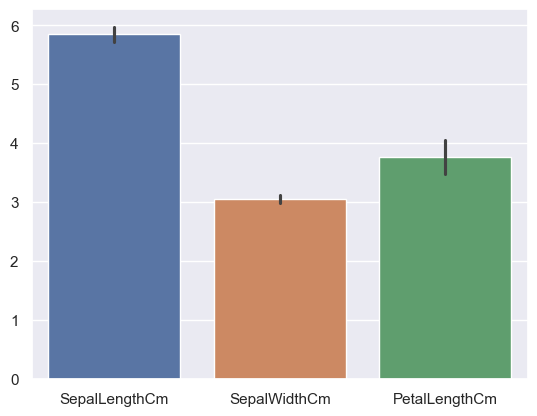

In [73]:
sns.barplot(x)

<Axes: xlabel='Species', ylabel='count'>

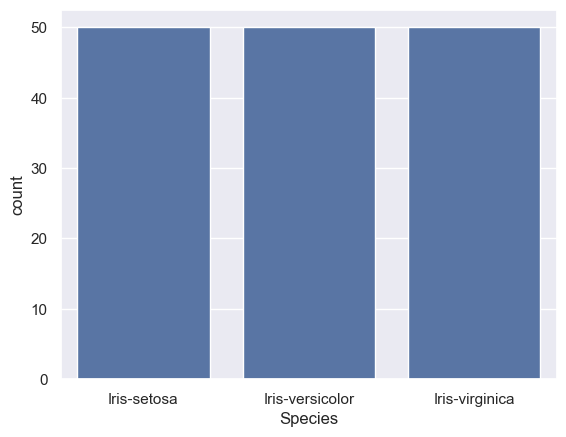

In [135]:
sns.barplot(pd.value_counts(y))

# Encoding species name from categorical to numerical

In [142]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
y_lbe = lbe.fit_transform(y)
y_lbe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Splitting data into train and test

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_lbe, test_size=0.3, random_state=50)

In [159]:
print(f'x train dimensions = {x_train.shape}\ny train dimensions = {y_train.shape}\nx test dimensions  = {x_test.shape}\ny test dimensions  = {y_test.shape}'
)

x train dimensions = (105, 3)
y train dimensions = (105,)
x test dimensions  = (45, 3)
y test dimensions  = (45,)


# Importing classification algorithm KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

- Applying algorithm

In [179]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [198]:
y_pred = knn.predict(x_test)

In [200]:
y_pred

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       2])

# Evaluating results

In [203]:
from sklearn.metrics import accuracy_score

result = accuracy_score(y_true = y_test, y_pred = y_pred)

In [205]:
result

0.9333333333333333

In [211]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test, y_pred = y_pred)

array([[14,  0,  0],
       [ 0, 14,  3],
       [ 0,  0, 14]], dtype=int64)